# Hierarchical Clustering in Practice

In [117]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
import scipy as sp
import scipy.cluster
import scipy.cluster.hierarchy as hierarchy
import scipy.spatial.distance

#import matplotlib as mpl
import seaborn as sns
%matplotlib inline

## Synthetic data

We'll use the same synthetic data as we did in the k-means case -- ie.,
three "blobs" living in 30 dimensions.

In [118]:
X, y = sk_data.make_blobs(n_samples=100, centers=3, n_features=30,
                          center_box=(-10.0, 10.0),random_state=0)

As a reminder of the raw data here is the visualization: first the raw data, then an embedding into 2-D (using MDS).

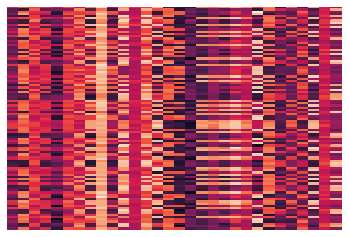

In [119]:
_ = sns.heatmap(X, xticklabels=False, yticklabels=False, linewidths=0,cbar=False)

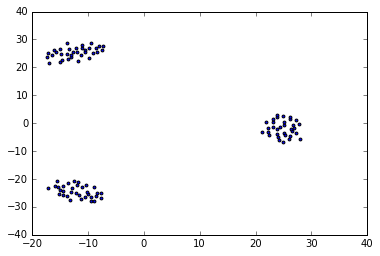

In [120]:
import sklearn.manifold
euclidean_dists = metrics.euclidean_distances(X)
mds = sklearn.manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=0,
                   dissimilarity="precomputed", n_jobs=1)
fit = mds.fit(euclidean_dists)
pos = fit.embedding_
_ = plt.scatter(pos[:, 0], pos[:, 1], s=8)

Hierarchical clustering is available in __sklearn__, but there is a much more fully developed set of tools in the __scipy__ package and that is the one to use.

In [121]:
import scipy.cluster
import scipy.cluster.hierarchy as hierarchy
import scipy.spatial.distance
# linkages = ['single','complete','average','weighted']
Z = hierarchy.linkage(X,method='complete')

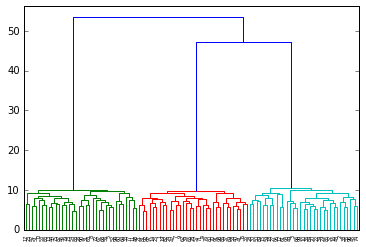

In [122]:
R = hierarchy.dendrogram(Z)

## Working with real data

Once again we'll use the "20 Newsgroup" data provided as example data in sklearn.

(http://scikit-learn.org/stable/datasets/twenty_newsgroups.html).

In [123]:
from sklearn.datasets import fetch_20newsgroups
categories = ['comp.os.ms-windows.misc', 'sci.space','rec.sport.baseball']
news_data = fetch_20newsgroups(subset='train', categories=categories)

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', min_df=4, max_df=0.8)
data = vectorizer.fit_transform(news_data.data).todense()
data.shape

(1781, 9409)

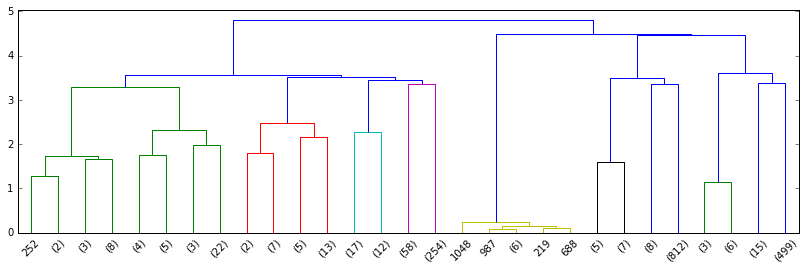

In [131]:
# metrics can be ‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, ‘cosine’, 
# ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘kulsinski’, ‘mahalanobis’, ‘matching’, 
# ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, 
# ‘sqeuclidean’, ‘yule’.
Z_20ng = hierarchy.linkage(data, method='ward', metric='euclidean')
plt.figure(figsize=(14,4))
R_20ng = hierarchy.dendrogram(Z_20ng, p=4, truncate_mode='level', show_leaf_counts=True)

### Selecting the Number of Clusters

In [126]:
clusters = hierarchy.fcluster(Z_20ng, 3, criterion='maxclust')
print(clusters.shape)
clusters

(1781,)


array([3, 3, 3, ..., 1, 3, 1], dtype=int32)

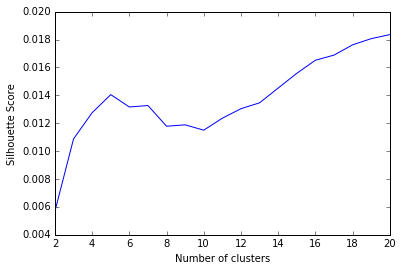

In [132]:
max_clusters = 20
s = np.zeros(max_clusters+1)
for k in range(2,max_clusters+1):
    clusters = hierarchy.fcluster(Z_20ng, k, criterion='maxclust')
    s[k] = metrics.silhouette_score(data,clusters,metric='euclidean')
plt.plot(range(2,len(s)),s[2:])
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')